# *SCALIB* - Spacecraft Conjunction Assessment Library

## Import libraries

### Generic Python libraries and notebooks settings.

In [1]:
# Import matplotlib library and setup environment for plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib import pyplot as plt, rc

# Import file system libraries
from pathlib import Path
import os

# Set rendering parameters to use TeX font if not working on Juno app.
if not '/private/var/' in os.getcwd():
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 11})
    rc('text', usetex=True)
    
# Get current working directory path for the tool parent folder and print it.
parent_folder = 'scalib'
cwd = str(Path(os.getcwd()[:os.getcwd().index(parent_folder)+len(parent_folder)]))
print('Parent working directory: %s' % cwd)



Parent working directory: /Users/jjrr/Documents/SCA-Project/scalib


### Import SCALIB modules

In [2]:
# Import custom libraries from local folder.
import sys
sys.path.append("..")

# Import utils library containing multiple functions/classes
from scalib import utils
from scalib import cfg

# Import class to create/manage CDMs
from scalib.cdm import ConjunctionDataMessage as CDM

# Import classes to handle Conjunction Events
from scalib.event import ConjunctionEvent as CE
from scalib.event import ConjunctionEventsDataset as CED

# Import NN classes to create NN models
from scalib.rnn import ConjunctionEventForecaster as CEF
from scalib.ann import CollisionRisk as CRE

from scalib.eda import kelvins_challenge_events

import pandas as pd
import numpy as np 

np.random.seed(1)

# Data Loading
Kessler accepts CDMs either in KVN format or as pandas dataframes. We hereby show a pandas dataframe loading example:

## Import Events from text files in KVN format.

In [3]:
#Instead, this is a generic real CDM data loader that should parse your Pandas:
#filepath = 'path_to_csv/file.csv'

#df=pd.read_csv(filepath)
#events = CED.from_pandas(df)

## Load [Kelvins Collision Avoidance Challenge dataset](https://kelvins.esa.int/collision-avoidance-challenge/data/)

In [4]:
#As an example, we first show the case in which the data comes from the Kelvins competition.
#For this, we built a specific converter that takes care of the conversion from Kelvins format
#to standard CDM format (the data can be downloaded at https://kelvins.esa.int/collision-avoidance-challenge/data/):
filepath = os.path.join(cwd,'data/esa-challenge/train_data.csv')

# Get ConjunctionEventsDataset object 
events = kelvins_challenge_events(filepath,
            drop_features = ['c_rcs_estimate', 't_rcs_estimate'], 
            num_events = 1000)

Kelvins Challenge dataset imported from external file (162634 entries):
/Users/jjrr/Documents/SCA-Project/scalib/data/esa-challenge/train_data.csv

Features removed:
 - c_rcs_estimate                            	 - t_rcs_estimate                            	

Dropping rows with NaNs... 146571 entries remaining.
Removing outliers... 127037 entries remaining.
Grouped rows into 9586 events
Taking TCA as current time: 2023-08-08 10:44:21.160238

> 100% |██████████| (1000/1000) | Total time:     00:05 (140.56 it/s) 1000 Conjunction Events imported.       


> 100% |██████████| (1000/1000) | Total time:     00:15 (44.28 it/s) Conjunction Events dataset imported successfully.


,CCSDS_CDM_VERS,CREATION_DATE,ORIGINATOR,MESSAGE_FOR,MESSAGE_ID,TCA,MISS_DISTANCE,RELATIVE_SPEED,RELATIVE_POSITION_R,RELATIVE_POSITION_T,...,OBJECT2_CTHR_RDOT,OBJECT2_CTHR_TDOT,OBJECT2_CTHR_NDOT,OBJECT2_CTHR_DRG,OBJECT2_CTHR_SRP,OBJECT2_CTHR_THR,__CREATION_DATE,__TCA,__DAYS_TO_TCA,__EVENT_ID
0,1.0,2023-08-06T21:08:09.793238,None,None,None,2023-08-08T10:44:21.160238,14923.0,13792.0,453.8,5976.6,...,None,None,None,None,None,None,0.000000,1.566798,1.566798,0
1,1.0,2023-08-07T05:45:33.721238,None,None,None,2023-08-08T10:44:21.160238,14544.0,13792.0,474.3,5821.2,...,None,None,None,None,None,None,0.359305,1.566798,1.207494,0
2,1.0,2023-08-07T11:53:11.707238,None,None,None,2023-08-08T10:44:21.160238,14475.0,13792.0,474.6,5796.2,...,None,None,None,None,None,None,0.614605,1.566798,0.952193,0
3,1.0,2023-08-07T20:49:37.727238,None,None,None,2023-08-08T10:44:21.160238,14579.0,13792.0,472.7,5838.9,...,None,None,None,None,None,None,0.987129,1.566798,0.579669,0
4,1.0,2023-08-08T04:33:06.718238,None,None,None,2023-08-08T10:44:21.160238,14510.0,13792.0,478.7,5811.1,...,None,None,None,None,None,None,1.308992,1.566798,0.257806,0
5,1.0,2023-08-01T22:00:29.839238,None,None,None,2023-08-08T10:44:21.160238,2392.0,3434.0,74.3,2317.1,...,None,None,None,None,None,None,0.000000,6.530455,6.530455,1
6,1.0,2023-08-02T21:15:34.938238,None,None,None,2023-08-08T10:44:21.160238,3587.0,3434.0,99.0,3475.4,...,None,None,None,None,None,None,0.968809,6.530455,5.561646,1
7,1.0,2023-08-03T05:18:11.237238,None,None,None,2023-08-08T10:44:21.160238,7882.0,3434.0,-50.0,-7638.3,...,None,None,None,None,None,None,1.303951,6.530455,5.226504,1
8,1.0,2023-08-04T21:03:32.030238,None,None,None,2023-08-08T10:44:21.160238,26899.0,3434.0,-82.0,-26067.0,...,None,None,None,None,None,None,2.960442,6.530455,3.570013,1
9,1.0,2023-08-01T11:08:09.048238,None,None,None,2023-08-08T10:44:21.160238,22902.0,14348.0,-1157.6,-6306.2,...,None,None,None,None,None,None,0.000000,6.983474,6.983474,2


,MISS_DISTANCE,RELATIVE_SPEED,RELATIVE_POSITION_R,RELATIVE_POSITION_T,RELATIVE_POSITION_N,RELATIVE_VELOCITY_R,RELATIVE_VELOCITY_T,RELATIVE_VELOCITY_N,OBJECT1_RECOMMENDED_OD_SPAN,OBJECT1_ACTUAL_OD_SPAN,...,OBJECT2_CNDOT_R,OBJECT2_CNDOT_T,OBJECT2_CNDOT_N,OBJECT2_CNDOT_RDOT,OBJECT2_CNDOT_TDOT,OBJECT2_CNDOT_NDOT,__CREATION_DATE,__TCA,__DAYS_TO_TCA,__EVENT_ID
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,...,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,14896.142826,10712.031004,-18.707105,304.262751,410.745867,-1.276850,-8700.307883,227.713783,13.044377,12.641857,...,4.218132,-59.852539,8.287500,0.058168,-0.004735,0.058218,2.851664,6.098527,3.246863,496.115495
std,13801.036333,4042.088258,577.559322,13824.042163,14855.829051,111.171857,4979.251031,5526.960030,9.536399,7.751615,...,52.773395,1545.472861,50.446718,1.588414,0.055262,0.322305,1.977027,1.328597,1.996072,288.034743
min,40.000000,149.000000,-4470.500000,-43909.400000,-50988.600000,-2224.000000,-15902.700000,-9581.400000,1.390000,0.080000,...,-753.780100,-33117.820000,-342.945300,-18.866969,-0.871775,0.000002,0.000000,-0.036302,-0.144270,0.000000
25%,4016.000000,7877.000000,-235.800000,-4739.150000,-6298.550000,-23.200000,-13584.300000,-5459.800000,7.160000,7.060000,...,-0.086123,-18.420402,-0.014724,-0.016900,-0.002698,0.000670,1.066528,6.140579,1.498279,251.000000
50%,10014.000000,11913.000000,-18.000000,74.200000,129.400000,0.200000,-9358.300000,1322.800000,12.030000,11.980000,...,0.217361,0.004328,0.217107,-0.000004,-0.000232,0.003650,2.652029,6.694961,3.149181,490.000000
75%,22604.000000,14302.000000,212.350000,5214.850000,6486.250000,23.300000,-4138.700000,5722.000000,16.640000,16.560000,...,2.582571,15.202825,3.481818,0.020375,0.000071,0.018141,4.419396,6.818743,4.929736,743.000000
max,64250.000000,16433.000000,1998.900000,46773.900000,50836.600000,1553.400000,146.100000,9844.900000,144.020000,80.650000,...,835.976700,17137.406034,777.673100,33.620900,0.769449,7.126812,6.976343,6.993832,6.993832,999.000000


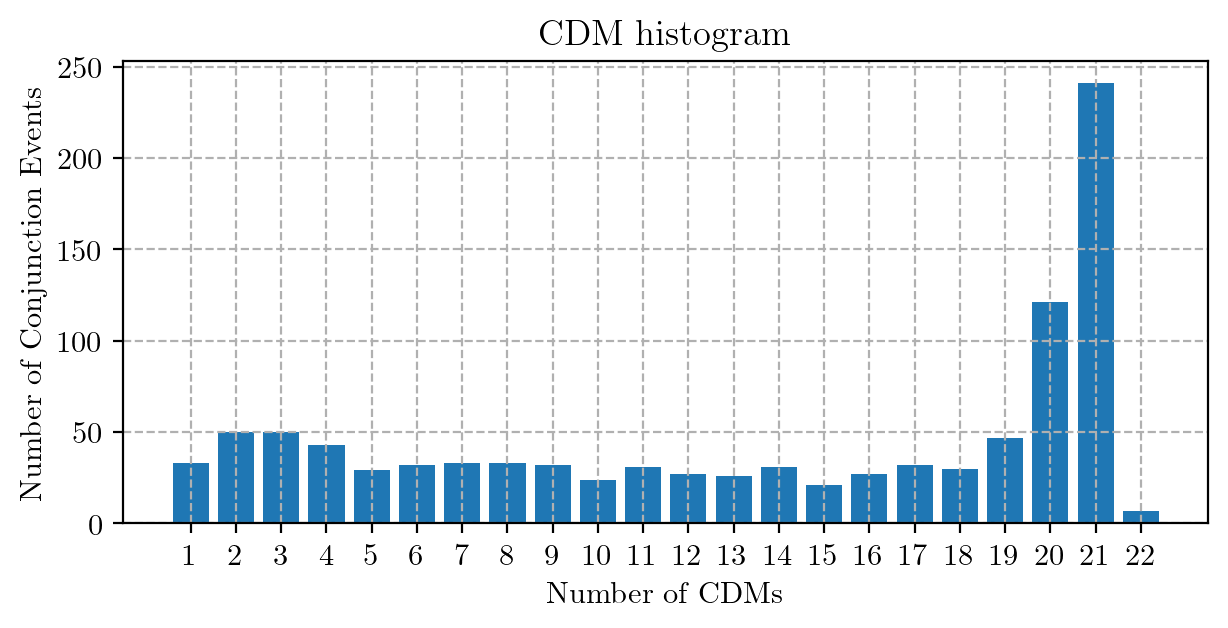

In [5]:
# Plot histograms of CDMs
events.plot_event_lengths()

# Get Conjunction Events as a pandas DataFrame including a local Event ID.
df_events = events.to_dataframe(event_id=True)

# Display head of DataFrame
display(df_events.head(10))

# Display statistics
display(df_events.describe())

In [6]:
# The ConjunctionEventsDataset class constructor is an object containing a list
# of ConjunctionEvents objects, that is, sets of different number of CDMs 
# describing different conjunction events.
print('{}\n'.format(events))

# The ConjunctionEvent class constructor is an object containing a list of 
# Conjunction Data Message (CDM) objects associated to the same conjunction 
# event.
event = events[0] 
print('{}\n'.format(event))

# The ConjunctionDataMessage class constructor is an object containing all 
# relevant information of a specific conjunction at a given point in time for a 
# given Event.
cdm = events[0][0]
print('{}\n'.format(cdm))

ConjunctionEventsDataset(Events:1000 | Number of CDMs per event: 1 (min), 22 (max), 13.61 (mean))

ConjunctionEvent(CDMs: 5)

CCSDS_CDM_VERS                        = 1.0
CREATION_DATE                         = 2023-08-06T21:08:09.793238
ORIGINATOR                            =
MESSAGE_ID                            =
TCA                                   = 2023-08-08T10:44:21.160238
MISS_DISTANCE                         = 14923.0
RELATIVE_SPEED                        = 13792.0
RELATIVE_POSITION_R                   = 453.8
RELATIVE_POSITION_T                   = 5976.6
RELATIVE_POSITION_N                   = -13666.8
RELATIVE_VELOCITY_R                   = -7.2
RELATIVE_VELOCITY_T                   = -12637.0
RELATIVE_VELOCITY_N                   = -5525.9
OBJECT                                = OBJECT2
OBJECT_DESIGNATOR                     =
CATALOG_NAME                          =
OBJECT_NAME                           =
INTERNATIONAL_DESIGNATOR              =
OBJECT_TYPE                 

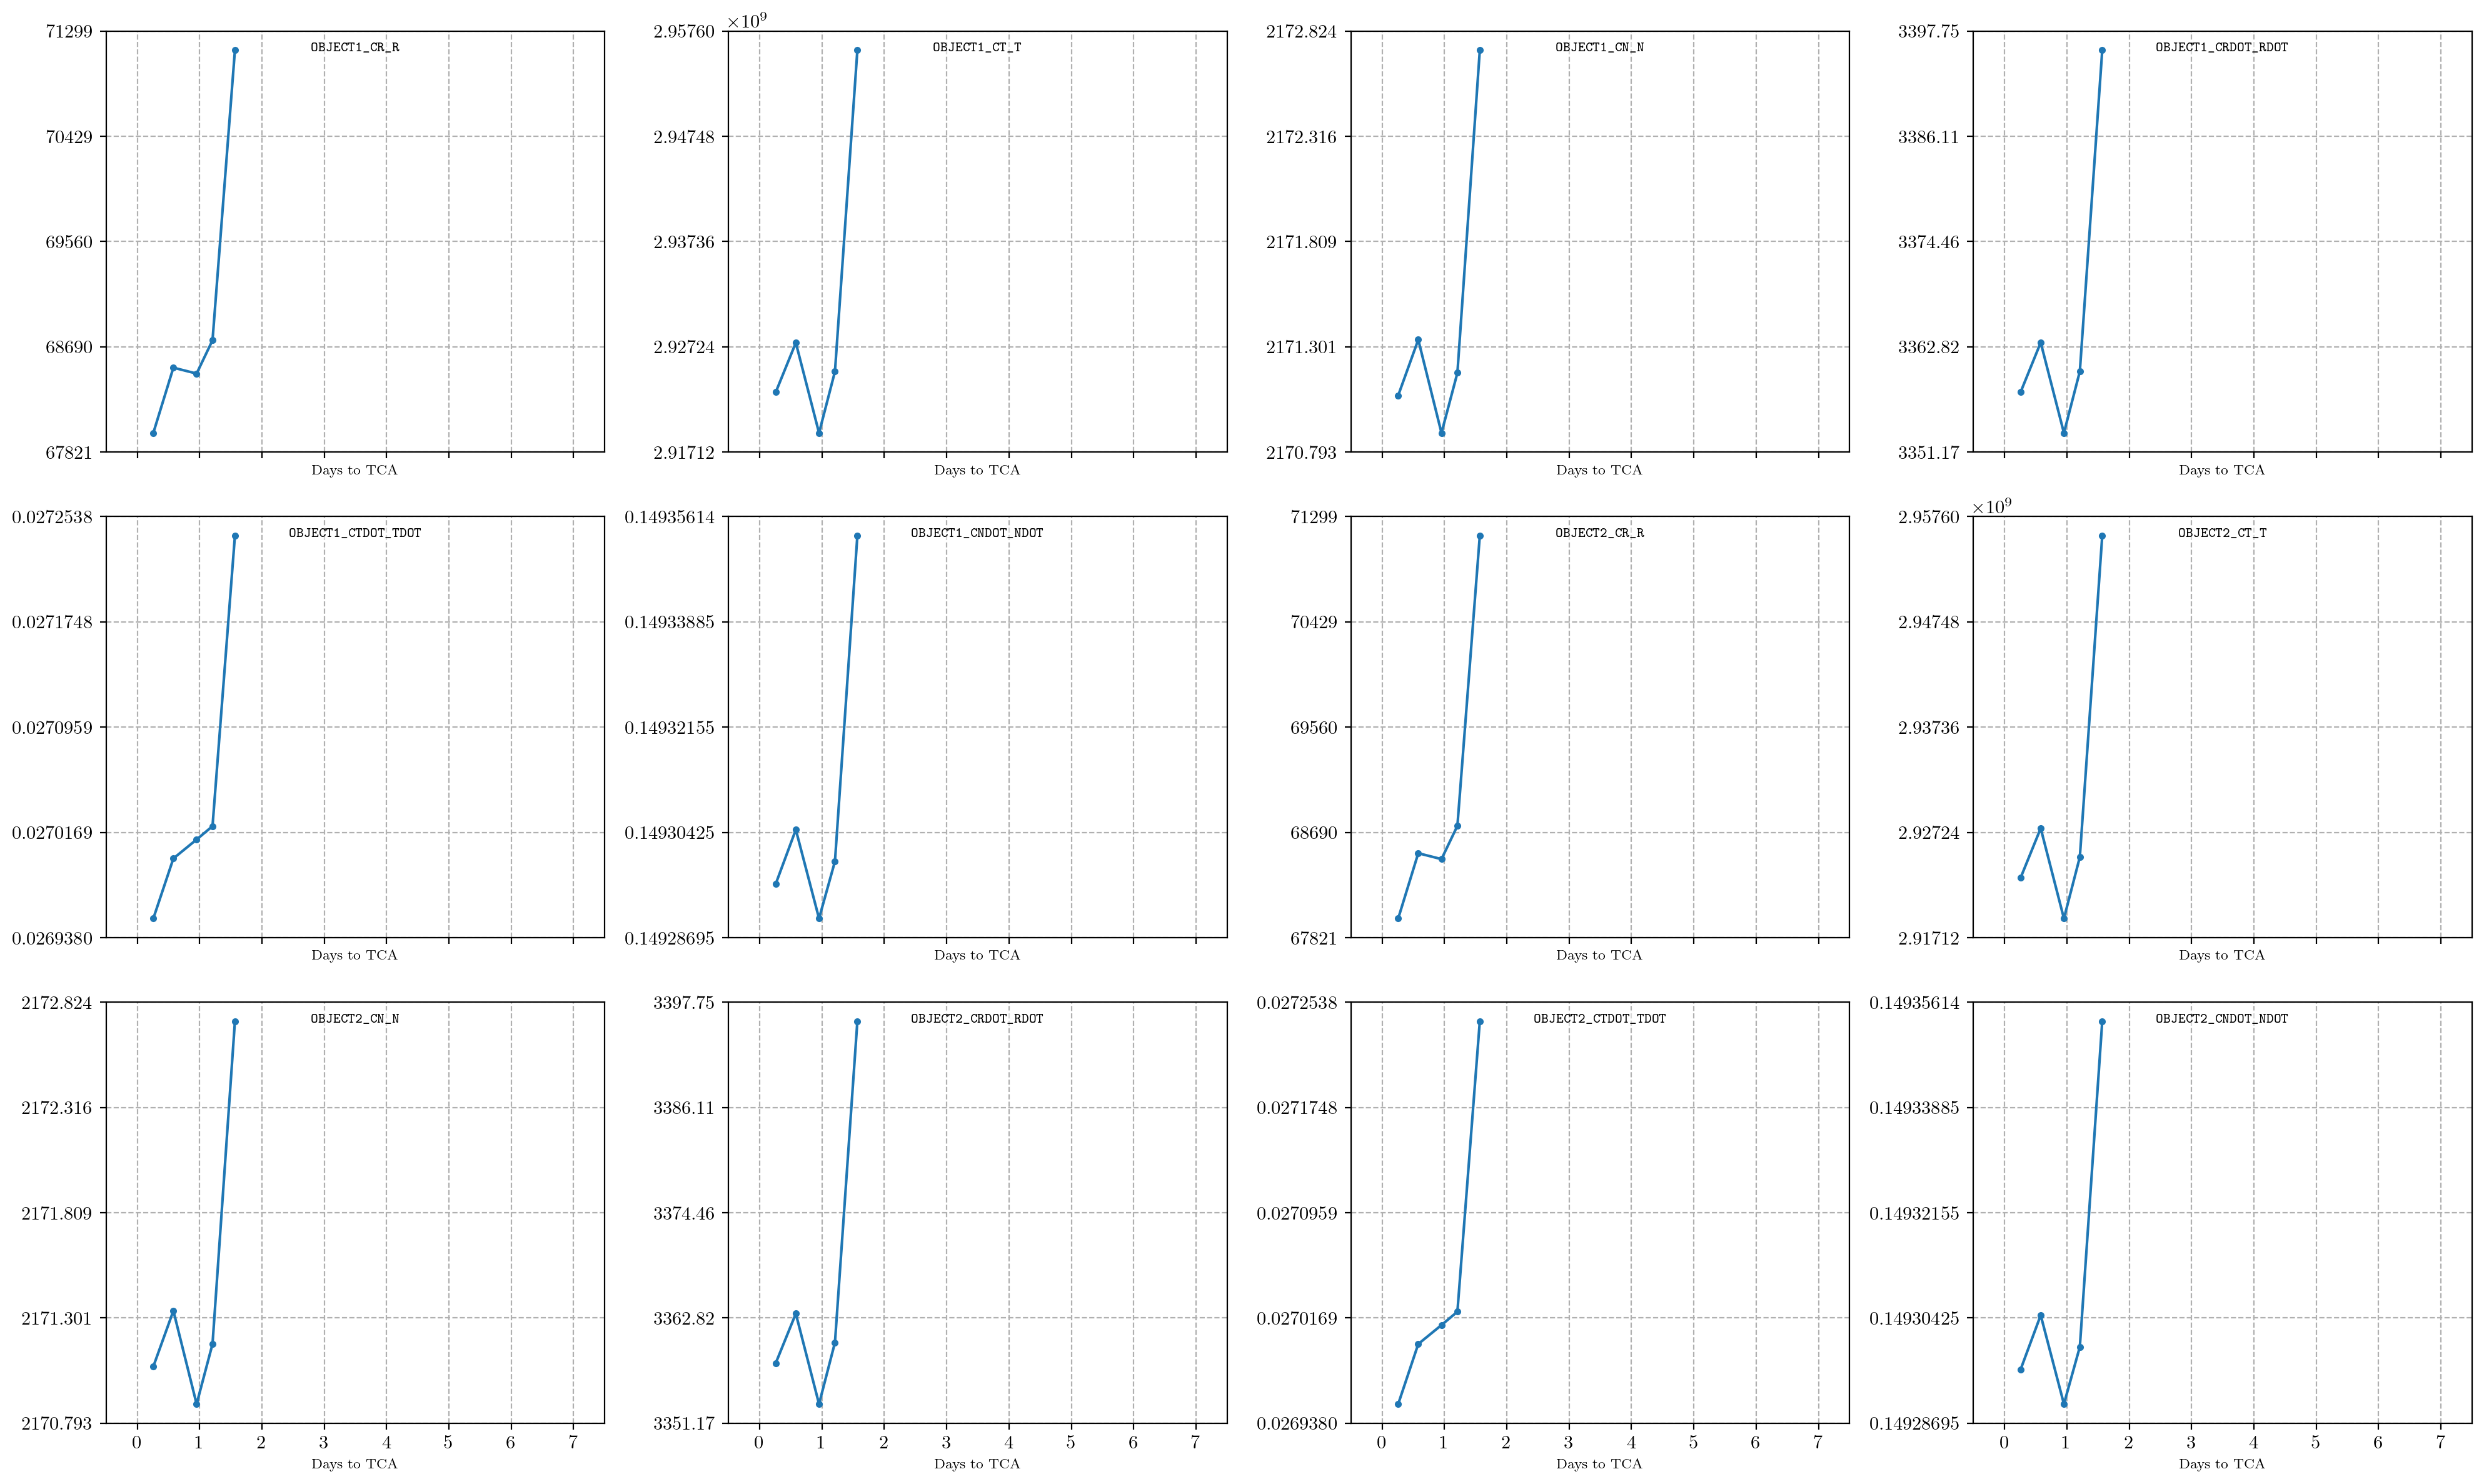

In [7]:
event.plot_uncertainty(diagonal=True)

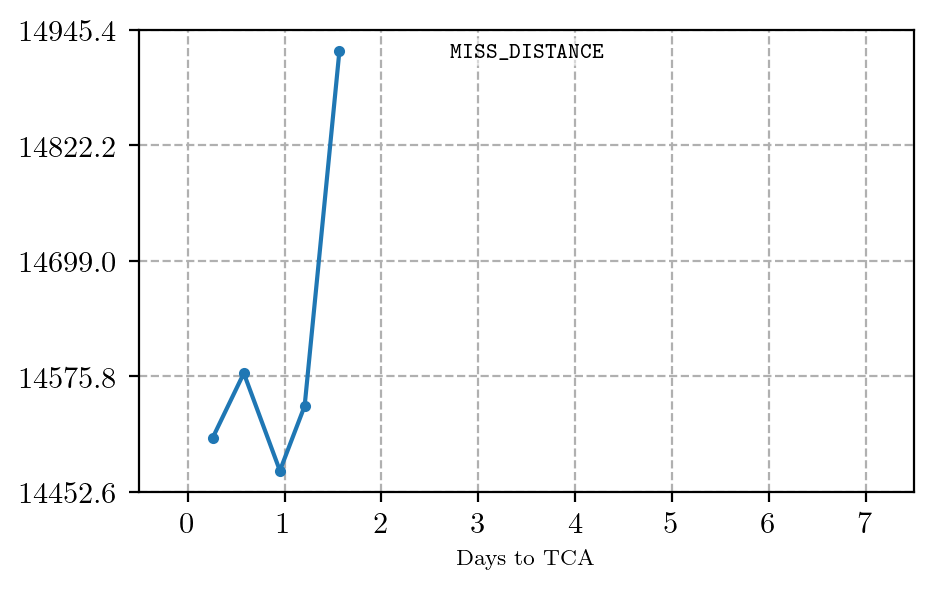

In [8]:
event.plot_feature(feature='MISS_DISTANCE')

### Exploring `SCALIB` classes
`ConjunctionEvent()` class is a user defined object constructor that allows the creation of Conjunction Events as stand-alone objects and some additional operations using the information underlying in the Conjunction Data Messaged contained on it.

In [9]:
# ConjunctionDataMessage class.
utils.docstring(CDM)

# ConjunctionEvent class.
utils.docstring(CE)

# ConjunctionEventsDataset class.
utils.docstring(CED)

Method: copy

Creates a deep copy of a CDM object.

        Returns:
            ConjunctionDataMessage: Deep copy of CDM object.
        
________________________________________________________________________________
Method: copy_from

Copies CDM object into self attribute within class.

        Args:
            other_cdm (Type[ConjunctionDataMessage]): External CDM to create the
            copy from.
        
________________________________________________________________________________
Method: datetime_to_str

None
________________________________________________________________________________
Method: get_covariance

Get covariance matrix

        Args:
            object_id (int): Object ID to which the covarianve matrix belongs to

        Returns:
            np.ndarray: Covariance matrix.
        
________________________________________________________________________________
Method: get_object

None
_______________________________________________________________________

# Training Recurrent-Neural Network model for Conjunction Event forecasting

In [10]:
# Get features names
print(cfg.cdm_clusters_obligatory)

nn_features = events.common_features(only_numeric=True)
print(utils.tabular_list(nn_features))

{'header_obligatory': ['CCSDS_CDM_VERS', 'CREATION_DATE', 'ORIGINATOR', 'MESSAGE_ID'], 'relative_metadata_obligatory': ['TCA', 'MISS_DISTANCE'], 'metadata_obligatory': ['OBJECT', 'OBJECT_DESIGNATOR', 'CATALOG_NAME', 'OBJECT_NAME', 'INTERNATIONAL_DESIGNATOR', 'EPHEMERIS_NAME', 'COVARIANCE_METHOD', 'MANEUVERABLE', 'REF_FRAME'], 'data_od_obligatory': [], 'data_state_obligatory': ['X', 'Y', 'Z', 'X_DOT', 'Y_DOT', 'Z_DOT'], 'data_covariance_obligatory': ['CR_R', 'CT_R', 'CT_T', 'CN_R', 'CN_T', 'CN_N', 'CRDOT_R', 'CRDOT_T', 'CRDOT_N', 'CRDOT_RDOT', 'CTDOT_R', 'CTDOT_T', 'CTDOT_N', 'CTDOT_RDOT', 'CTDOT_TDOT', 'CNDOT_R', 'CNDOT_T', 'CNDOT_N', 'CNDOT_RDOT', 'CNDOT_TDOT', 'CNDOT_NDOT']}
> 100% |██████████| (1000/1000) | Total time:     00:00 (71089.90 it/s) Conjunction Events dataset imported successfully.
MISS_DISTANCE              	OBJECT1_CT_R               	OBJECT2_CN_R               	
RELATIVE_SPEED             	OBJECT1_CT_T               	OBJECT2_CN_T               	
RELATIVE_POSITION_R   

In [11]:
# Split data into a test set (5% of the total number of events)
len_test_set=int(0.05*len(events))

# Get Events to test model: used to compute the error the model would have in 
# run-mode.
events_test=events[-len_test_set:]
print('Test data:', events_test)

# Get events used for training and validation:
# - Training set: Used to train the model and backpropagate the loss.
# - Validation set: Used to compute the loss so that hyperparameters can be 
#   adjusted.
events_train_and_val=events[:-len_test_set]
print('Training and validation data:', events_train_and_val)

Test data: ConjunctionEventsDataset(Events:50 | Number of CDMs per event: 1 (min), 21 (max), 14.36 (mean))
Training and validation data: ConjunctionEventsDataset(Events:950 | Number of CDMs per event: 1 (min), 22 (max), 13.57 (mean))


In [12]:
# Create an LSTM predictor, specialized to the nn_features we extracted above
model = CEF(
            lstm_size=256,  # Number of hidden units per LSTM layer
            lstm_depth=2,  # Number of stacked LSTM layers
            dropout=0.2,  # Dropout probability
            features=nn_features)  # The list of feature names to use in the LSTM

# Start training
model.learn(events_train_and_val, 
            epochs=10, # Number of epochs (one epoch is one full pass through the training dataset)
            lr=1e-3, # Learning rate, can decrease it if training diverges
            batch_size=16, # Minibatch size, can be decreased if there are issues with memory use
            device='cpu', # Can be 'cuda' if there is a GPU available
            valid_proportion=0.15, # Proportion of the data to use as a validation set internally
            num_workers=4, # Number of multithreaded dataloader workers, 4 is good for performance, but if there are any issues or errors, please try num_workers=1 as this solves issues with PyTorch most of the time
            event_samples_for_stats=1000) # Number of events to use to compute NN normalization factors, have this number as big as possible (and at least a few thousands)

LSTM predictor with params: 876,355
Computing normalization statistics
> 100% |██████████| (918/918) | Total time:     00:00 (77672.30 it/s) Conjunction Events dataset imported successfully.


KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/irpenv/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/homebrew/anaconda3/envs/irpenv/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/homebrew/anaconda3/envs/irpenv/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/Users/jjrr/Documents/SCA-Project/scalib/notebooks/../scalib/rnn.py", line 102, in __getitem__
    x[i] = torch.tensor([(cdm[feature]-feature_mean)/\
  File "/Users/jjrr/Documents/SCA-Project/scalib/notebooks/../scalib/cdm.py", line 708, in __getitem__
    return self.to_dict()[key]
KeyError: '__EVENT_ID'


In [ ]:
#Save the model to a file after training:
model.save(filepath="models/rnn/LSTM_20epochs_lr10-4_batchsize16")

Plotting to file: images/plot_loss.pdf


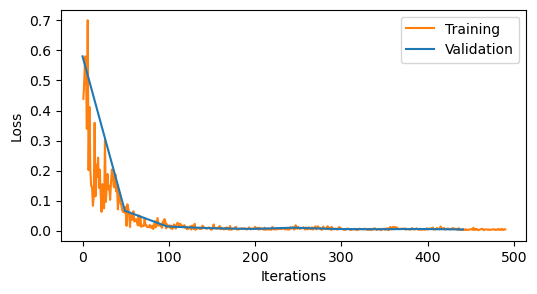

In [ ]:
#NN loss plotted to a file:
model.plot_loss(filepath='images/plot_loss.pdf')

In [ ]:
#we show an example CDM from the set:
events_train_and_val[0][0]

In [ ]:
#we take a single event, we remove the last CDM and try to predict it
event=events_test[3]
event_len = len(event)
print(event)
event_beginning = event[0:event_len-1]
print(event_beginning)
event_evolution = model.predict_event(event_beginning, num_samples=100, max_length=14)

In [ ]:
#We plot the prediction in red:
axs = event_evolution.plot_features(['RELATIVE_SPEED', 'MISS_DISTANCE', 'OBJECT1_CT_T'], return_axs=True, linewidth=0.1, color='red', alpha=0.33, label='Prediction')
#and the ground truth value in blue:
event.plot_features(['RELATIVE_SPEED', 'MISS_DISTANCE', 'OBJECT1_CT_T'], axs=axs, label='Real', legend=True)

In [ ]:
#we now plot the uncertainty prediction for all the covariance matrix elements of both OBJECT1 and OBJECT2:
axs = event_evolution.plot_uncertainty(return_axs=True, linewidth=0.5, label='Prediction', alpha=0.5, color='red', legend=True, diagonal=False)
event.plot_uncertainty(axs=axs, label='Real', diagonal=False)

## Test & Development

In [27]:
# Import json library and create function to format dictionaries.
import json
format_json = lambda x: json.dumps(x, indent=4)

import torch
import torch.nn as nn

class LayerConstructor():
    def __init__(self, layer_type:str, input_size:int, output_size:int, 
        activation_function = None, **kwargs) -> None:

        # Check layer_type is either linear or lstm.
        if not layer_type in ['lstm', 'linear']:
            raise ValueError('Layer {} not recognised'.format(layer_type))

        self.layer_type = layer_type
        self.input_size = input_size
        self.output_size = output_size
        self.dropout = kwargs.get('dropout', 0)

        self.activation_function = activation_function

        # Set internal values for the model.
        for key, value in kwargs.items(): setattr(self, '_' + key, value)

        if layer_type == 'lstm':
            self._init_lstm()
        elif layer_type == 'linear':
            self._init_linear()

    def _init_linear(self) -> None:
        """Initialize Linear layer.
        """
        # Set default parameters for the Linear class.
        default_parameters = {'bias': True,
                              'device': None,
                              'dtype': None}
        # Check if any default parameter has been passed to the class and add it
        # to self.                   
        for parameter, value in default_parameters.items():
            if not hasattr(self, parameter): 
                setattr(self, parameter, value)

        # Initialize Linear layer object.
        self.layer = nn.Linear(in_features   = self.input_size, 
                               out_features  = self.output_size,
                               bias          = self.bias, 
                               device        = self.device, 
                               dtype         = self.dtype)

    def _init_lstm(self) -> None:
        """Initialize LSTM layer.
        """

        # Define default parameters for the LSTM class.
        default_parameters = {'num_layers':     2,
                              'batch_first':    True,
                              'dropout':        0,
                              'bias':           True,
                              'bidirectional':  False,
                              'proj_size':      0,
                              'device':         None}

        # Check if any default parameter has been passed to the class and add it
        # to self.
        for parameter, value in default_parameters.items():
            if not hasattr(self, parameter): 
                setattr(self, parameter, value)

        # Initialize the LSTM class under layer attribute.
        self.layer = nn.LSTM(input_size = self.input_size, 
                        hidden_size     = self.output_size, 
                        num_layers      = self.num_layers, 
                        batch_first     = self.batch_first, 
                        dropout         = self.dropout,
                        bias            = self.bias,
                        bidirectional   = self.bidirectional,
                        proj_size       = self.proj_size)

    def reset_lstm_state(self, batch_size:int) -> None:
        """Initialize LSTM hidden state (h) and cell state (c).

        Args:
            batch_size (int): Batch size.
        """
        h = torch.zeros(self.num_layers, batch_size, self.output_size)
        c = torch.zeros(self.num_layers, batch_size, self.output_size)

        h = h.to(self.device)
        c = c.to(self.device)

        self.hidden = (h, c)

    def _forward_linear(self) -> torch.FloatTensor:
        """Forward method for Linear layer.

        Returns:
            torch.FloatTensor: Outputs of the Linear layer.
        """

        outputs = self.layer(self.inputs)

        return outputs

    def _forward_lstm(self, **kwargs) -> torch.FloatTensor:
        """Forward method for LSTM layer including packing and padding tensors
        with variable lengths.

        Args:
            inputs (torch.FloatTensor): Input features.

        Returns:
            torch.FloatTensor: Outputs of the LSTM layer.
        """

        # Get variable lengths and maximum length from the inputs tensor.
        inputs_lengths = map(len, self._inputs)
        total_length = max(inputs_length)[0]

        # All events are padded with zeros in order to get the same number of 
        # tensors, and therefore same event_length. This makes batch processing 
        # easier.
        #
        # To optimize training and avoid computing empty CDMs, PyTorch allows 
        # to packing a padded sequence by producing a PackedSequence object. 
        # A PackedSequence object is a tuple of two lists. One contains the 
        # elements of sequences interleaved by time steps and other contains the 
        # the batch size at each step. 
        # Pack Tensor containing padded sequences of variable length.
        outputs = nn.utils.rnn.pack_padded_sequence(input = self._inputs, 
                    lengths = self.inputs_lengths, batch_first=self.batch_first, 
                    enforce_sorted = kwargs.get('enforce_sorted', False))

        # Process outputs through the LSTM layer.
        outputs, self.hidden = self.layer(outputs, self.hidden)

        # Pads a packed batch of variable length sequences from LSTM layer.
        outputs, _ = nn.utils.rnn.pad_packed_sequence(sequence = outputs, 
                    batch_first=self.batch_first, total_length = total_length)

        return outputs

    def forward(self, inputs:torch.FloatTensor, **kwargs) -> torch.FloatTensor:

        self._inputs = inputs

        if self.layer_type=='lstm':
            outputs = self._forward_lstm()
        elif self.layer_type == 'linear':
            outputs = self._forward_linear()

        # Cancel out a random proportion p of the neurons to avoid 
        # overfitting
        if hasattr(self, 'dropout'):
            d = nn.Dropout(p = self.dropout, inplace = True)
            outputs = d(outputs)

        # Apply activation function
        if not self.activation_function is None:
            self.activation_function(outputs)

        return outputs

    def __repr__(self) -> str:
        """Print readable information about the layer.

        Returns:
            str: Class name with number of CDMs objects contained on it.
        """
        return 'Layer: {}'.format(self.layer) + \
               (' -> Dropout: {}'.format(self.dropout) \
                    if self.dropout > 0 else '') + \
               ' -> Activation Function: {}'.format(self.activation_function)

In [28]:
class Sequential():
    def __init__(self, layers:list, input_size:int, output_size:int, **kwargs):

    
        self.input_size = input_size
        self.output_size = output_size

        for l, layer in enumerate(layers):

            layer['input_size'] = input_size if l==0 else layers[l-1]['neurons']
            layer['output_size'] = layers[l]['neurons'] if l<len(layers) else output_size

        layers.append(dict(layer_type = 'linear',
                            input_size = layers[-1]['output_size'],
                            output_size = output_size))

        self.layers_settings = layers

        sequential = []
        for l, layer in enumerate(layers):
            kwargs = {}
            for k, v in layer.items():
                if k not in ['layer_type', 'input_size', 'output_size']:
                    kwargs[k] = v

            sequential.append(LayerConstructor(
                                        layer_type = layer['layer_type'],
                                        input_size = layer['input_size'], 
                                        output_size = layer['output_size'],
                                        **kwargs))
        self.sequential = sequential
        

    def __len__(self) -> int:
        """Get number of layers in the model.

        Returns:
            int: Number of layers in the model.
        """
        return len(self.sequential)

    def __repr__(self) -> str:
        """Print readable information about the layer.

        Returns:
            str: Class name with number of CDMs objects contained on it.
        """
        return 'Sequential(Layers:{}, Inputs:{}, Outputs:{})'\
               .format(len(self.sequential), 
                       input_size, output_size)



In [ ]:
class ConjunctionEventForecaster(nn.Module):
    def __init__(self, layers:list, output_size:int, 
        features:Union[list, str] = None):
        super().__init__()
        if features is None:
            features = ['__CREATION_DATE',
                        '__TCA',
                        'MISS_DISTANCE',
                        'RELATIVE_SPEED',
                        'RELATIVE_POSITION_R',
                        'RELATIVE_POSITION_T',
                        'RELATIVE_POSITION_N',
                        'RELATIVE_VELOCITY_R',
                        'RELATIVE_VELOCITY_T',
                        'RELATIVE_VELOCITY_N',
                        'OBJECT1_X',
                        'OBJECT1_Y',
                        'OBJECT1_Z',
                        'OBJECT1_X_DOT',
                        'OBJECT1_Y_DOT',
                        'OBJECT1_Z_DOT',
                        'OBJECT1_CR_R',
                        'OBJECT1_CT_R',
                        'OBJECT1_CT_T',
                        'OBJECT1_CN_R',
                        'OBJECT1_CN_T',
                        'OBJECT1_CN_N',
                        'OBJECT1_CRDOT_R',
                        'OBJECT1_CRDOT_T',
                        'OBJECT1_CRDOT_N',
                        'OBJECT1_CRDOT_RDOT',
                        'OBJECT1_CTDOT_R',
                        'OBJECT1_CTDOT_T',
                        'OBJECT1_CTDOT_N',
                        'OBJECT1_CTDOT_RDOT',
                        'OBJECT1_CTDOT_TDOT',
                        'OBJECT1_CNDOT_R',
                        'OBJECT1_CNDOT_T',
                        'OBJECT1_CNDOT_N',
                        'OBJECT1_CNDOT_RDOT',
                        'OBJECT1_CNDOT_TDOT',
                        'OBJECT1_CNDOT_NDOT',
                        'OBJECT2_X',
                        'OBJECT2_Y',
                        'OBJECT2_Z',
                        'OBJECT2_X_DOT',
                        'OBJECT2_Y_DOT',
                        'OBJECT2_Z_DOT',
                        'OBJECT2_CR_R',
                        'OBJECT2_CT_R',
                        'OBJECT2_CT_T',
                        'OBJECT2_CN_R',
                        'OBJECT2_CN_T',
                        'OBJECT2_CN_N',
                        'OBJECT2_CRDOT_R',
                        'OBJECT2_CRDOT_T',
                        'OBJECT2_CRDOT_N',
                        'OBJECT2_CRDOT_RDOT',
                        'OBJECT2_CTDOT_R',
                        'OBJECT2_CTDOT_T',
                        'OBJECT2_CTDOT_N',
                        'OBJECT2_CTDOT_RDOT',
                        'OBJECT2_CTDOT_TDOT',
                        'OBJECT2_CNDOT_R',
                        'OBJECT2_CNDOT_T',
                        'OBJECT2_CNDOT_N',
                        'OBJECT2_CNDOT_RDOT',
                        'OBJECT2_CNDOT_TDOT',
                        'OBJECT2_CNDOT_NDOT']

        self.input_size = len(features)

        self.network = Sequential(layers = layers, 
                            input_size = self.input_size, 
                            output_size = output_size)


        self._features = features
        self._features_stats = None
        self._hist_train_loss = []
        self._hist_train_loss_iters = []
        self._hist_valid_loss = []
        self._hist_valid_loss_iters = []

    def plot_loss(self, filepath:str = None, figsize:tuple = (6,3)) -> None:
        """Plot RNN loss in the training set (orange) and validation set (blue) 
        vs number of iterations during model training.

        Args:
            filepath (str, optional): Path where the plot is saved. Defaults to 
            None.
            figsize (tuple, optional): Size of the plot. Defaults to (6 ,3).
        """
        fig, ax = plt.subplots(figsize = figsize)
        ax.plot(self._hist_train_loss_iters, self._hist_train_loss, 
                label='Training', color='tab:orange')
        ax.plot(self._hist_valid_loss_iters, self._hist_valid_loss, 
                label='Validation', color='tab:blue')
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Loss')
        ax.legend()
        if filepath is not None:
            print('Plotting to file: {}'.format(filepath))
            plt.savefig(filepath)

    def learn(self, event_set:list, epochs:int = 2, lr:float = 1e-3, 
              batch_size:int = 8, device:str = 'cpu', 
              valid_proportion:float = 0.15, num_workers:int = 4, 
              event_samples_for_stats:int = 250, filename_prefix:str = None) -> None:
        """Train RNN model.

        Args:
            event_set (list): List of Conjunction Event objects to use for 
            training (including validationd data).
            epochs (int, optional): Number of epochs used for training. Defaults 
            to 2.
            lr (float, optional): Learning rate. Defaults to 1e-3.
            batch_size (int, optional): Batch size. Defaults to 8.
            device (str, optional): Device where torchs are allocated. Defaults 
            to 'cpu'.
            valid_proportion (float, optional): Proportion of all data used for 
            validation (value must be between 0 and 1). Defaults to 0.15.
            num_workers (int, optional): _description_. Defaults to 4.
            event_samples_for_stats (int, optional): Number of events considered 
            to compute the mean and standard deviation used for normalization. 
            Defaults to 250.
            filename_prefix (str, optional): _description_. Defaults to None.

        Raises:
            ValueError: valid_proportion is not in the range (0, 1).
            RuntimeError: Validation set does not contain any event as a result 
            of valid_proportion being too low.
        """

        
        # Define the device on which the torch will be allocated:
        if device is None: device = torch.device('cpu')
        self._device = device
        self.to(device)

        # Get number of parameters in the model.
        num_params = sum(p.numel() for p in self.parameters())
        print('LSTM predictor with params: {:,}'.format(num_params))

        # Ensure number of events considered to compute statistics measures
        # (mean and standard deviation) is lower or equal to the total number 
        # of events available.
        if event_samples_for_stats > len(event_set):
            event_samples_for_stats = len(event_set)
        
        # Consider only events that contain at least 2 CDM objects.
        event_set = event_set.filter(lambda event: len(event) > 1)

        # Check valid_proportion is between 0.0 and 1.0
        if valid_proportion<0 or valid_proportion>1.0:
            raise ValueError('Parameter valid_proportion ({})'+ \
                             ' must be greater than 0 and lower than 1' \
                             .format(valid_proportion))

        # Compute the size of the validation set from valid_proportion.
        valid_set_size = int(len(event_set) * valid_proportion)
        
        # Check size of validation set is greater than 0.
        if valid_set_size == 0:
            raise RuntimeError('Validation set size is 0 for the given' + \
                               ' valid_proportion ({}) and number of ' + \
                               'events ({})' \
                               .format(valid_proportion, len(event_set)))
        
        # Get training set size.
        train_set_size = len(event_set) - valid_set_size

        # If mean and standard deviations per feature are not provided, get 
        # them using the DatasetEventDataset class to normalize features in the
        # training and validation datasets.
        if self._features_stats is None:
            print('Computing normalization statistics')
            self._features_stats = \
                DatasetEventDataset(event_set[:event_samples_for_stats], 
                                    self._features)._features_stats
        
        # Get training and validation datasets with normalized features using
        # the stats metrics. 
        train_set = DatasetEventDataset(event_set[:train_set_size], 
                                        self._features, self._features_stats)
        valid_set = DatasetEventDataset(event_set[train_set_size:], 
                                        self._features, self._features_stats)

        # Get loader objects for training and validation sets. The DataLoader 
        # class works by creating an iterable dataset object and iterating over 
        # it in batches, which are then fed into the model for processing. The 
        # object it creates has the shape (batches, items) where items are the 
        # a number of elements n = int(len(Dataset)/batch_size) taken from the 
        # Dataset passed into the class.
        train_loader = DataLoader(train_set, batch_size = batch_size, 
                                  shuffle = True, num_workers = num_workers)
        valid_loader = DataLoader(valid_set, batch_size = len(valid_set), 
                                  shuffle = True, num_workers = num_workers)

        # Set-up optimizer and criterion.
        optimizer = optim.Adam(self.parameters(), lr = lr)
        criterion = nn.MSELoss()

        # Set training mode ON to inform layers such as Dropout and BatchNorm, 
        # which are designed to behave differently during training and 
        # evaluation. For instance, in training mode, BatchNorm updates a moving 
        # average on each new batch; whereas, for evaluation mode, these updates 
        # are frozen.
        self.train()
        
        if len(self._hist_train_loss_iters) == 0:
            total_iters = 0
        else:
            total_iters = self._hist_train_loss_iters[-1]

        pb_epochs = utils.ProgressBar(iterations=range(epochs), 
            description = 'Training Feature Forecaster model...', 
            desc_loc='right')
            
        for epoch in pb_epochs.iterations:
            with torch.no_grad():
                for _, (events, event_lengths) in enumerate(valid_loader):

                    # Allocate events and event_lengths tensors to the device
                    # defined by the model.
                    events = events.to(device)
                    event_lengths = event_lengths.to(device)

                    # Get batch_size from event_lengths as it can be smaller for
                    # the last minibatch of an epoch.
                    batch_size = event_lengths.nelement()

                    # For every event object, take all CDMs except the last one 
                    # as inputs.
                    inputs = events[:, :-1]

                    # For every event object, shift CDM object list to set as 
                    # targets from 2nd CDM to last one. 
                    target = events[:, 1:]
                    event_lengths -= 1

                    # Initialize LSTM hidden state (h0) and cell state (c0).
                    self.reset(batch_size)

                    # Forecast next CDMs of the mini-batch using the inputs. The 
                    # model also requires a second parameter with the number of 
                    # CDMs per event object in order to pack padded sequences to 
                    # optimize computation.
                    output = self.forward(inputs)

                    # Compute loss using the criterion and add it to the array.
                    loss = criterion(output, target)
                    valid_loss = float(loss)
                    self._hist_valid_loss.append(valid_loss)


                    self._hist_valid_loss_iters.append(total_iters)
                    
            # Iterate over all batches containes in the training loader. Every 
            # batch (i_minibatch) contains an equal number of events which in 
            # turn may contain a different number of CDM objects.
            for i_minibatch, (events, event_lengths) in enumerate(train_loader):
                total_iters += 1

                # Allocate events and event_lengths tensors to the device 
                # defined by the model.
                events = events.to(device)
                event_lengths = event_lengths.to(device)

                # Get batch_size from event_lengths as it can be smaller for the 
                # last minibatch of an epoch.
                batch_size = event_lengths.nelement() 

                # Set as inputs all the CDM objects but the last one from all 
                # events in the mini-batch. For every event contained in the
                # inputs tensor the shape is (n_cdms-1, n_features)
                inputs = events[:, :-1, :]

                # Set as targets the next CDM object following every CDM in the 
                # inputs tensor. The objective is to train the model using only 
                # one CDM to forecast the next one. For every event contained in 
                # the targets tensor the shape is (n_cdms-1, n_features)
                target = events[:, 1:, :]
                event_lengths -= 1

                # Initialize LSTM hidden state (h0) and cell state (c0).
                self.reset(batch_size)

                # Clear all the gradients of all the parameters of the model.
                optimizer.zero_grad()
                output = self.forward(inputs)

                # Compute MSE loss using criterion and store it in an array.
                loss = criterion(output, target)
                train_loss = float(loss)
                self._hist_train_loss.append(train_loss)

                # Backpropagate MSE loss.
                loss.backward()

                # Update model hyperparameters taking into account the loss.
                optimizer.step()

                # Convert loss from the training dataset to numpy and store it.
                
                self._hist_train_loss_iters.append(total_iters)

                description = f'Iterations {total_iters} | ' + \
                    f'Minibatch {i_minibatch+1}/{len(train_loader)} | ' + \
                    f'Training loss {train_loss:.4e} | ' + \
                    f'Validation loss {valid_loss:.4e}'
                
                pb_epochs.refresh(i = epoch+1, description = description, 
                    nested_progress = True)


            if filename_prefix is not None:
                filename = filename_prefix + '_epoch_{}'.format(epoch+1)
                description = f'Saving model checkpoint to file {filename}'
                pb_epochs.refresh(i = epoch, description = description, 
                    nested_progress = True)
                self.save(filename)

    def predict(self, event: ConjunctionEvent) -> ConjunctionDataMessage:
        """Predict next CDM object from a given ConjunctionEvent object.

        Args:
            event (ConjunctionEvent): Conjunction Event object containing CDM(s) 
            object(s).

        Raises:
            RuntimeError: _description_

        Returns:
            ConjunctionDataMessage: CDM object.
        """

        ds = DatasetEventDataset(ConjunctionEventsDataset(events=[event]), 
                                 features = self._features, 
                                 features_stats = self._features_stats)
        
        # Get CDM objects and number of CDMs contained in the dataset taking the 
        # event passed as a parameter.
        inputs, inputs_length = ds[0]

        # Allocate torch to the 
        inputs = inputs.to(self._device)
        input_length = inputs_length.to(self._device)

        self.train()

        # Initialize LSTM hidden state (h) and cell state (c) assuming 
        # batch_size = 1.
        self.reset(1)

        # Forecast next CDM content
        output = self.forward(inputs.unsqueeze(0), 
                              inputs_length.unsqueeze(0)).squeeze()

        if utils.has_nan_or_inf(output):
            raise RuntimeError(f'Network output has nan or inf: {output}\n')

        output_last = output if output.ndim == 1 else output[-1]
 
        # Get creation date from first CDM object contained in the Conjunction 
        # Event.
        date0 = event[0]['CREATION_DATE']

        # Initialize new CDM object to store de-normalized values resulting from 
        # the RNN model.
        cdm = ConjunctionDataMessage()

        # Iterate over all the featues
        for i in range(len(self._features)):

            # Get feature name, mean and standard deviation.
            feature = self._features[i]
            feature_mean = self._features_stats['mean'][i]
            feature_stddev = self._features_stats['stddev'][i]

            # De-normalize the values for the feature using its assciated mean 
            # and standard deviation.
            value = feature_mean + feature_stddev * float(output_last[i].item()) 

            if feature == '__CREATION_DATE':
                # CDM creation date shall be equal or greater than the creation
                # date of the last CDM contained in the event. Otherwise, set 
                # the creation date equal to the previous CDM creation date.
                if value < event[-1]['__CREATION_DATE']:
                    value = event[-1]['__CREATION_DATE']
                cdm['CREATION_DATE'] = utils.add_days_to_date_str(date0, value)
            elif feature == '__TCA':
                cdm['TCA'] = utils.add_days_to_date_str(date0, value)
            else:
                cdm[feature] = value

        return cdm

    def predict_event_step(self, event:ConjunctionEvent, num_samples:int = 1) \
        -> Union[ConjunctionEvent, ConjunctionEventsDataset]:
        """Predict next CDM n-times for a given event object.

        Args:
            event (ConjunctionEvent): Conjunction Event object from which the 
            CDM is forecasted.
            num_samples (int, optional): Number of predictions. Defaults to 1.

        Returns:
            Union[ConjunctionEvent, ConjunctionEventsDataset]: Two possible outputs are returned
            depending on the parameter num_samples:
             - If num_samples = 1: Returns one ConjunctionEvent object with all CDMs 
                forecasted. 
             - If num_samples > 1: Returns ConjunctionEventsDataset object containing all 
                possible evolutions of the event (combinations of CDMs).
        """

        # Initialize empty list of events
        events = []
        for i in range(num_samples):

            # Create a copy of the event to avoid modifying it.
            i_event = event.copy()

            # Predict next CDM of the event.
            cdm = self.predict(i_event)

            # Add CDM object to the ConjunctionEvent object.
            i_event.add(cdm)

            # Append event to the Conjunction Events list.
            events.append(i_event)

        # Return Event object or ConjunctionEventsDataset objects.
        return es[0] if num_samples == 1 \
            else ConjunctionEventsDataset(events=events)
            

    def predict_event(self, event:ConjunctionEvent, num_samples:int = 1, 
                      max_length:int = 22) -> Union[ConjunctionEvent, ConjunctionEventsDataset]:
        """Forecast the evolution of a given Conjunction Event by predicting 
        upcoming CDMs until TCA.

        Args:
            event (ConjunctionEvent): Conjunction Event to forecast.
            num_samples (int, optional): Number of possible CDMs considered in 
            every forecasting step. Defaults to 1.
            max_length (int, optional): Maximum number of CDM objects contained 
            in the event object. Defaults to 22.

        Returns:
            Union[ConjunctionEvent, ConjunctionEventsDataset]: Two possible outputs are returned
            depending on the parameter num_samples:
             - If num_samples = 1: Returns one ConjunctionEvent object with all CDMs 
                forecasted. 
             - If num_samples > 1: Returns ConjunctionEventsDataset object containing all 
                possible evolutions of the event (combinations of CDMs).
        """

        # Initialize list to store Conjunction Events.
        events = []

        # Iterate over all sequences
        pb_samples = utils.progressbar(iterations = range(num_samples),  
            description='> Forecasting Conjunction Event evolution ...',
            desc_loc='right')

        for i in pb_samples.iterations:

            # Update progress bar.
            pb_features.refresh(i = i+1)

            # Create a deep copy of the input event to avoid modifying the 
            # original object
            i_event = event.copy()

            # Run loop to forecast new CDMs until one of the following 
            # conditions are reached:
            #  - CDM creation date is later than TCA.
            #  - TCA is later than 7 days.
            #  - The conjunction event contains same number of CDMs equal to 
            #       max_length.
            while True:

                # Predict new CDM from i_event and append object to i_event.
                cdm = self.predict(i_event)
                i_event.add(cdm)

                # Stop loop if one of the conditions is met.
                if (cdm['__CREATION_DATE'] > cdm['__TCA']) or \
                   (cdm['__TCA'] > 7) or \
                   (len(i_event) > max_length): break

            # Append i_event to the final list of events.       
            events.append(i_event)

        # Update progress bar.
        pb_features.refresh(i = i+1, 
            description = '> Conjunction Event evolution forecasted.')

        return events[0] if num_samples==1 \
            else ConjunctionEventsDataset(events = events)

    def save(self, filepath:str) -> None:
        """Save model to an external file.

        Args:
            filepath (str): Path where the model is saved.
        """
        print('Saving LSTM predictor to file: {}'.format(filepath))
        torch.save(self, filepath)

    @staticmethod
    def load(filepath:str):
        print('Loading LSTM predictor from file: {}'.format(filepath))
        return torch.load(filepath)

    def reset(self, batch_size:int):
        """Initialize hidden state (h) and cell state (c) for all the LSTM 
        layers in the Sequencial object.
        """
        for layer in self.sequential:
            if layer.layer_type=='lstm':
                layer.reset_lstm_state(batch_size)

    def forward(self, x:torch.FloatTensor) -> torch.FloatTensor:
        """Predict new CDM containing normalized values.

        Args:
            x (torch.FloatTensor): Tensor with shape (n_events, 
            max_event_length, features) containing the input values for RNN 
            processing.
            x_lengths (torch.IntTensor): Tensor with shape (n_events, 1) 
            containing the number of CDMs contained in every event. This tensor 
            is used to unpack padded torch.

        Returns:
            torch.FloatTensor: Tensor containing normalized values of the new CDM.
        """

        for layer in self.network:
            layer.forward(x)


        return x

In [ ]:
# Define input and output size of the RNN model.
input_size = 50
output_size = 25

# Define parameter batch_first for batch processing.
batch_first = True

# Define number of output neurons per layer.
layers = [dict(layer_type = 'lstm', 
                neurons = 252, 
                batch_first = batch_first,
                num_layers = 2,
                dropout = 0.2,
                activation_function = nn.ReLU(inplace=True))]

model = Sequential(layers = layers, 
                   input_size = input_size, 
                   output_size = output_size)


print(model)
for layer in model.sequential:

      print(layer.layer_type)
